In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("F:\Prueba.txt", engine='python', sep='\s+')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df

,Fecha,precipitacion
0,1990-01-01,5
1,1990-02-01,4
2,1990-03-01,10
3,1990-04-01,9
4,1990-05-01,0
5,1990-06-01,10
6,1990-07-01,1
7,1990-08-01,5
8,1990-09-01,2
9,1990-10-01,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          48 non-null     datetime64[ns]
 1   precipitacion  48 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 896.0 bytes


In [8]:
df1=df.resample(rule='M').mean()
df1

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [9]:
df_sum = df.groupby([df['Fecha'].dt.month_name(), df['Fecha'].dt.year], sort=False).sum()  # get sum for each individual month
df_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
df_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
df_sum
tempP = df_sum.groupby([df_sum['month']], sort=False).mean()
tempP

,precipitacion
month,
January,4.25
February,7.00
March,6.50
April,5.75
May,4.25
June,7.00
July,5.25
August,4.25
September,2.50


TypeError: only size-1 arrays can be converted to Python scalars

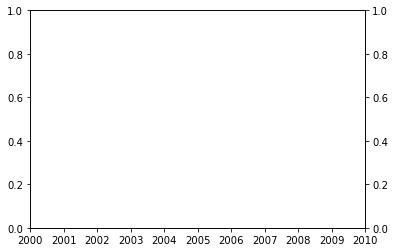

In [10]:
fig = plt.figure();
ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();

xticks = pd.to_datetime(tempP.index.tolist(), format='%B').sort_values() # must work for both axes
ax1.bar(xticks, tempP.values, color='blue')
ax2.plot(xticks, tempT.values, color='red')
plt.xticks(pd.to_datetime(tempP.index.tolist(), format='%B').sort_values()) # to show all ticks

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # must be called after plotting both axes

ax1.set_ylabel('Precipitation [mm]', fontsize=10)
ax2.set_ylabel('Temperature [°C]', fontsize=10)

plt.show()